References used :-

1)Plotting graphs
https://colab.research.google.com/drive/1L_IMo6v0a0ALK8nefZm6PqPSy0vZIWBT#scrollTo=hyyN-2qyK_T2

2)Baseline code for DQN gym implementation

https://stable-baselines.readthedocs.io/en/master/modules/dqn.html#example

In [11]:
#downloading necessary packages to run code on google colab
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install xvfb
!apt-get update && apt-get install cmake libopenmpi-dev python3-dev zlib1g-dev
!pip install stable-baselines
!apt-get install -y python-numpy python-dev cmake zlib1g-dev libjpeg-dev xvfb xorg-dev python-opengl libboost-all-dev libsdl2-dev swig

Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.19.6-1ubuntu4.2).
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  InRelease
Hit:2 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [83.2 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Fetched 158 kB in 3s (57.2 kB/s)
Reading packag

In [12]:
#importing other necessary libraries
!pip install pyvirtualdisplay
!pip install gym
!pip install "gym[atari]"
!pip install piglet

In [0]:
import os
import gym
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython import display as ipythondisplay 
from pyvirtualdisplay import Display
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines.deepq.policies import MlpPolicy, LnMlpPolicy
from stable_baselines.bench import Monitor
from stable_baselines.results_plotter import load_results, ts2xy
#Libraries to run DQN for gym environment
from stable_baselines import DQN  

In [14]:
best_mean_reward, n_steps = -np.inf, 0
#function to check the previous experiences and policy to determine the next step
def callback(_locals, _globals):
    global n_steps, best_mean_reward
    # display agent stats after every 1000 steps
    if (n_steps + 1) % 1000 == 0:
        # Verifying with earlier policies experienced by the agent
        x, y = ts2xy(load_results(log_dir), 'timesteps')
        if len(x) > 0:
            mean_reward = np.mean(y[-100:])
            print(x[-1], 'timesteps')
            if mean_reward > best_mean_reward:
                best_mean_reward = mean_reward
                # if a new optimum model is obtained , print it in the console
                print("Saving new best model at %d"%x[-1])
    n_steps += 1
    return True
  
display = Display(visible=0, size=(400, 300))
display.start()

<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '400x300x24', ':1013'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '400x300x24', ':1013'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

In [15]:
# Creating log directory
log_dir = "/tmp/gym/"
os.makedirs(log_dir, exist_ok=True)
#selecting Mountain car environment for agent
env = gym.make('IceHockey-ram-v0')
env = Monitor(env, log_dir, allow_early_resets=True)
env = DummyVecEnv([lambda: env])
#Defining the reinforcement model with layer normalized multi layer perceptron policy
model = DQN(LnMlpPolicy, env, verbose=1)
#training the model for set number of steps
model.learn(total_timesteps=50000, callback=callback)
model.save("atari")
#deleting model to load it in next cell
del model



/usr/local/lib/python3.6/dist-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


200 timesteps
1400 timesteps
2400 timesteps
3400 timesteps
9088 timesteps
10088 timesteps
11088 timesteps
12088 timesteps
17414 timesteps
18614 timesteps
19614 timesteps
20614 timesteps
21614 timesteps
27144 timesteps
28344 timesteps
29344 timesteps
30344 timesteps
31344 timesteps
37052 timesteps
38252 timesteps
Saving new best model at 38252
39252 timesteps
40252 timesteps
45528 timesteps
Saving new best model at 45528
46728 timesteps
47728 timesteps
48728 timesteps
54088 timesteps
Saving new best model at 54088
55288 timesteps
56245 timesteps
Saving new best model at 56245
57245 timesteps
58245 timesteps
63849 timesteps
65049 timesteps
66049 timesteps
67049 timesteps
72486 timesteps
Saving new best model at 72486
73486 timesteps
74457 timesteps
Saving new best model at 74457
75657 timesteps
76657 timesteps
82392 timesteps
83392 timesteps
84592 timesteps
85592 timesteps
90891 timesteps
91291 timesteps
91291 timesteps
91291 timesteps
91291 timesteps
96014 timesteps
Saving new best mode

In [0]:
def movingAverage(values, window):
    """
    Smooth values by doing a moving average
    """
    weights = np.repeat(1.0, window) / window
    return np.convolve(values, weights, 'valid')

  #function to plot the results
def plot_results(log_folder, title='Learning Curve'):
    x, y = ts2xy(load_results(log_folder), 'timesteps')
    y = movingAverage(y, window=50)
    # Truncate x
    x = x[len(x) - len(y):]
    fig = plt.figure(title)
    plt.plot(x, y)
    plt.xlabel('Timestep Count')
    plt.ylabel('Reward')
    plt.title(title + " Smoothed")
    plt.show()



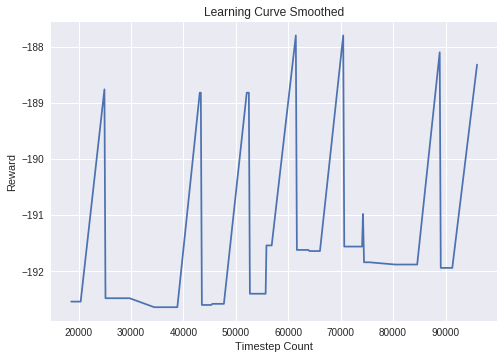

In [17]:
plot_results(log_dir)

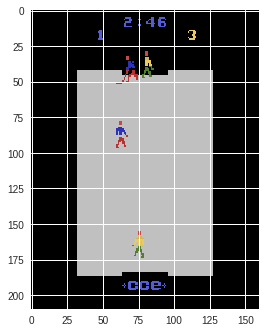

In [20]:
#predicting steps based on the trained data and displaying output using plot.
model = DQN.load("atari")
obs = env.reset()

for i in range(500):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    screen = env.render(mode='rgb_array')
    #showing output image for every iteration
    plt.imshow(screen)
    ipythondisplay.clear_output(wait=True)
    ipythondisplay.display(plt.gcf())

    
ipythondisplay.clear_output(wait=True)
env.close()